# Análise exploratória de dados qualitativos

In [99]:
# Importanto as bibliotecas necessárias
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import math

In [91]:
# estabelecendo o caminho onde o dataset está armazenado
caminho = '../data/raw/archive/xAPI-Edu-Data.csv'

# especificando as colunas de interesse para este estudo
coluna = ['gender', 'StageID', 'NationalITy', 'Class']

In [92]:
# lendo o arquivo csv
df = pd.read_csv(caminho, usecols=coluna)
df = df.query('NationalITy == "Jordan" and StageID == "MiddleSchool"')

# exibindo os cincos primeiros registros da tabela
df.head(5)

,gender,NationalITy,StageID,Class
69,M,Jordan,MiddleSchool,M
70,M,Jordan,MiddleSchool,L
75,M,Jordan,MiddleSchool,M
138,F,Jordan,MiddleSchool,H
139,M,Jordan,MiddleSchool,M


In [93]:
# exibindo algunas informações sobre o nosso conjunto de dados
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 96 entries, 69 to 479
Data columns (total 4 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   gender       96 non-null     object
 1   NationalITy  96 non-null     object
 2   StageID      96 non-null     object
 3   Class        96 non-null     object
dtypes: object(4)
memory usage: 3.8+ KB


In [94]:
# calculbando a frequência absoluta
frequencia_absoluta = df.groupby('NationalITy')['gender'].value_counts()

# calculbando a frequência relativa
frequencia_relativa = df.groupby('NationalITy')['gender'].value_counts(normalize=True)

# Criando a tabela com as frequências
tabela_frequencia = pd.DataFrame({
    'Frequência Absoluta': frequencia_absoluta,
    'Frequência Relativa': frequencia_relativa
})

# Mostrando a tabela de frequências para análise e escolha dos grupos para a pesquisa
tabela_frequencia

Frequência Absoluta  Frequência Relativa
NationalITy gender                                          
Jordan      M                        52             0.541667
            F                        44             0.458333

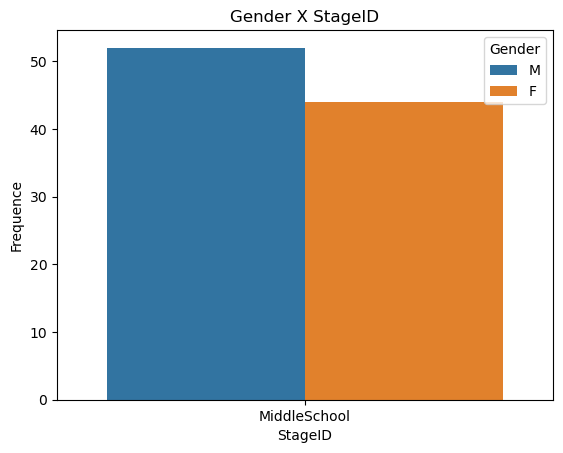

In [122]:
# Criar um gráfico de barras
sns.countplot(x='StageID', hue='gender', data=df)

# Adicionar título e rótulos aos eixos
plt.title('Gender X StageID')
plt.xlabel('StageID')
plt.ylabel('Frequence')

# Adicionar uma legenda
plt.legend(title='Gender')

# Mostrar o gráfico da distribuição de alunos por níve escolar
plt.show()

In [139]:
# selecionando randomicamente 44 homens
df_male = df.query('gender == "M"').sample(44, random_state=42)
df_female = df.query('gender == "F"')

# criando dataset com 44 homens e 44 mulheres
df_2 = pd.concat([df_male, df_female])

# Exibindo novo dataset
df_2

,gender,NationalITy,StageID,Class
397,M,Jordan,MiddleSchool,M
439,M,Jordan,MiddleSchool,M
445,M,Jordan,MiddleSchool,L
272,M,Jordan,MiddleSchool,M
441,M,Jordan,MiddleSchool,M
...,...,...,...,...
475,F,Jordan,MiddleSchool,L
476,F,Jordan,MiddleSchool,M
477,F,Jordan,MiddleSchool,M
478,F,Jordan,MiddleSchool,L


In [127]:
# exibindo medidas de tendência central
df_2.describe()

,gender,NationalITy,StageID,Class
count,88,88,88,88
unique,2,1,1,3
top,M,Jordan,MiddleSchool,M
freq,44,88,88,42


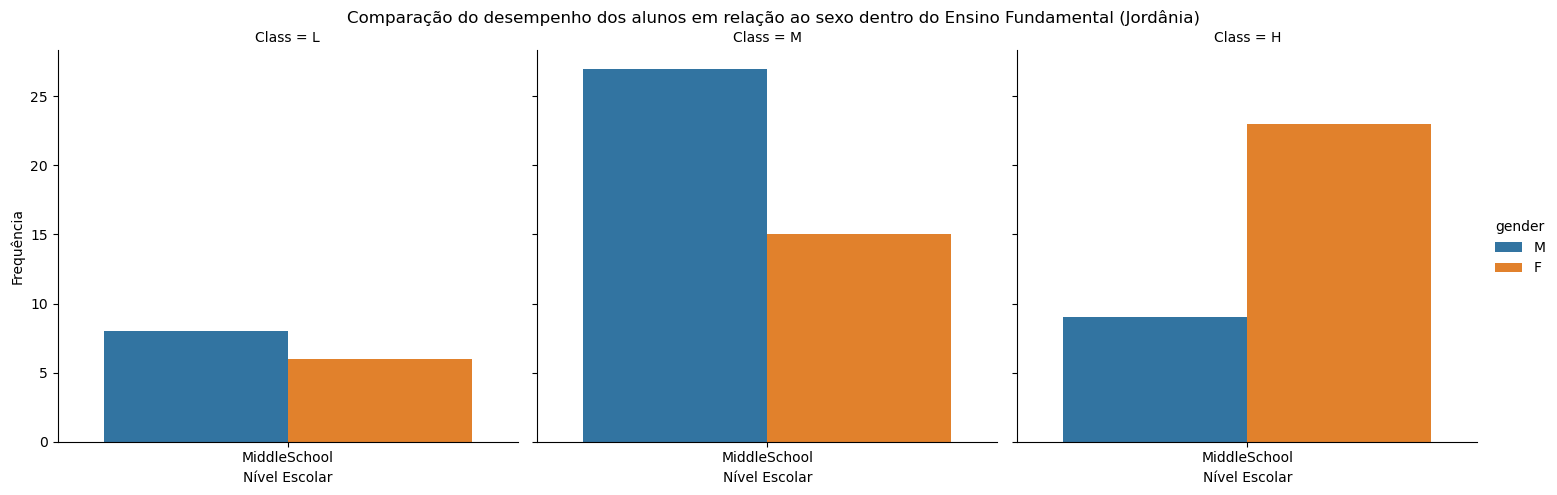

In [145]:
# Criar um gráfico categórico
g = sns.catplot(x='StageID', hue='gender', col='Class', data=df_2, kind='count', col_order=['L', 'M', 'H'])

# Adicionar título e rótulos aos eixos
g.fig.subplots_adjust(top=0.9) # ajustar para o título não sobrepor os gráficos
g.fig.suptitle('Comparação do desempenho dos alunos em relação ao sexo dentro do Ensino Fundamental (Jordânia)')
g.set_axis_labels('Nível Escolar', 'Frequência')

# Mostrar o gráfico
plt.show()